# ICA

In [1]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import sys
    
from pathlib import Path

path = (
    Path
    .cwd()
    .parent
    .parent
    .joinpath('project')
)

sys.path.append(path)

In [2]:
from __future__ import annotations

import pandas as pd

from project.reduction import (
    DimensionalityReduction,
    ICAStrategy
)
from project.visualizer.ica import (
    MatplotlibVisualizer,
    ICAVisualizer,
    PlotlyVisualizer
)
from project.visualizer.settings import Settings
from sklearn.datasets import (
    load_digits,
    load_iris,
    load_wine
)
from sklearn.preprocessing import StandardScaler

In [3]:
scale = True

loader = load_iris()

columns, data, target = (
    loader.feature_names,
    loader.data,
    loader.target
)

dataframe = pd.DataFrame(columns=columns, data=data)

In [4]:
if scale:
    scaler = StandardScaler()
    data = scaler.fit_transform(dataframe)

    dataframe = pd.DataFrame(columns=columns, data=data)

dataset = dataframe.to_numpy()

In [5]:
dataframe.columns.to_numpy().shape

(4,)

In [6]:
dataframe.shape

(150, 4)

In [7]:
dataframe.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [8]:
strategy = ICAStrategy(dataframe=dataframe, dataset=dataset, target=target)
reduction = DimensionalityReduction(strategy=strategy)

n_components = 3
transformation = reduction.reduce(n_components=n_components)

visualizer = PlotlyVisualizer(
    dimension=3,
    reduction=reduction,
    transformation=transformation
)

ica = ICAVisualizer(visualizer=visualizer)

method = str(strategy)
dimensionality = f"{n_components}-Component"

title = f"{dimensionality} {method} for the Iris Dataset"
ica.visualizer.engine.settings.title = title

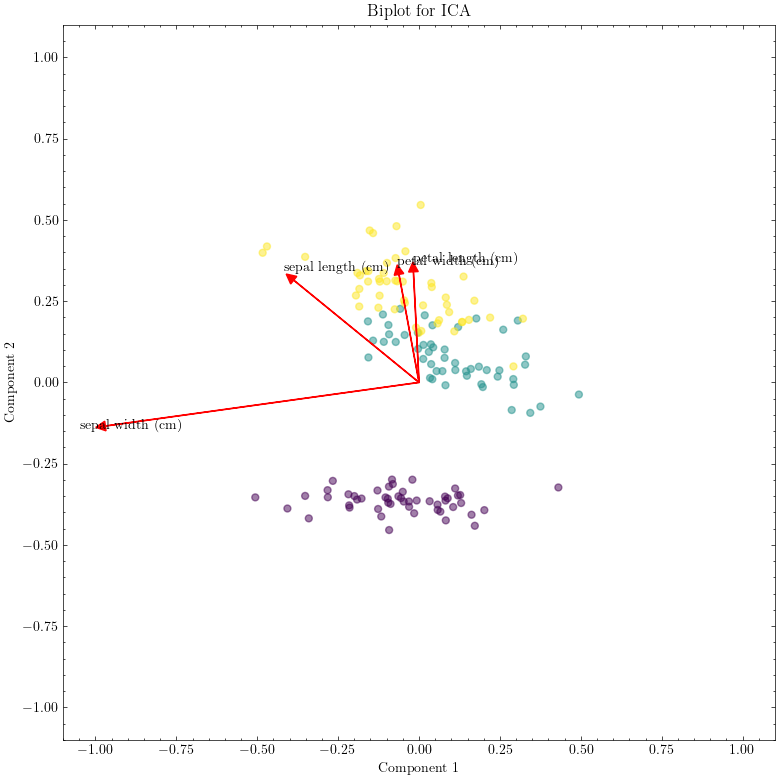

In [9]:
ica.biplot()
ica.show()

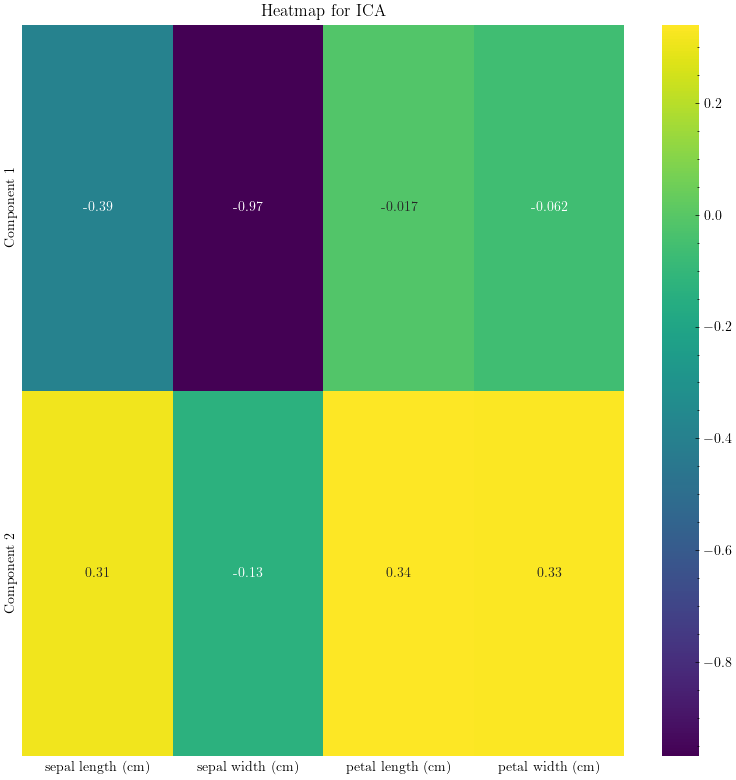

In [10]:
ica.heatmap()
ica.show()

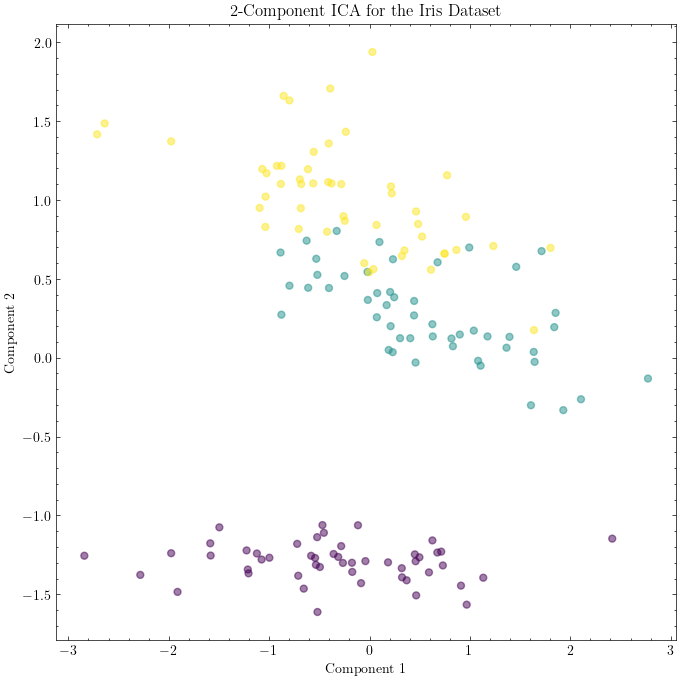

In [11]:
ica.transform()
ica.show()